In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Lowercase
In order to perform basic cleanup one of the major steps could be to convert data into lowercase for example "basically" and "Basically" could be considered two different words by the machine in further stages like tokenization, increasing the amount of work 

In [4]:
#converts the row at index 4
df['review'][4].lower()

'petter mattei\'s "love in the time of money" is a visually stunning film to watch. mr. mattei offers us a vivid portrait about human relations. this is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />this being a variation on the arthur schnitzler\'s play about the same theme, the director transfers the action to the present time new york where all these different characters meet and connect. each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. stylishly, the film has a sophisticated luxurious look. we are taken to see how these people live and the world they live in their own habitat.<br /><br />the only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. a big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case wit

In [5]:
#to convert the whole dataset and assign it to df 
df['review'] = df['review'].str.lower()
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


# Remove HTML Tags
HTML tags are used to make the browser understand but they are of no need here in analysis

In [6]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [7]:
text = '<html><body><p>Hello this is to test the function</p></body></html>'

In [8]:
remove_html_tags(text)

'Hello this is to test the function'

In [9]:
#applying our function to dataset
df['review'] = df['review'].apply(remove_html_tags)
df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [10]:
df['review'][4]

'petter mattei\'s "love in the time of money" is a visually stunning film to watch. mr. mattei offers us a vivid portrait about human relations. this is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. this being a variation on the arthur schnitzler\'s play about the same theme, the director transfers the action to the present time new york where all these different characters meet and connect. each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. stylishly, the film has a sophisticated luxurious look. we are taken to see how these people live and the world they live in their own habitat.the only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. a big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case with most of the people we 

# Remove URLS
Remove URLS using regular expression pattern : https?://\S+|www\.\S+

In [11]:
 def remove_urls(text):
        pattern = re.compile('https?://\S+|www\.\S+')
        return pattern.sub(r'', text)
        

In [12]:
text1 = 'check out my notebook https://www.kaggle.com/meghashivhare/text-preprocessing'
text2 = 'check out my notebook http://www.kaggle.com/meghashivhare/text-preprocessing'
text3 = 'search on google - www.google.com'

In [13]:
remove_urls(text1)

'check out my notebook '

In [14]:
remove_urls(text2)

'check out my notebook '

In [15]:
remove_urls(text3)

'search on google - '

# Remove Punctuations
Now we will remove punctuations (! , # etc) <br>
Reason <br>
Tokenization stage - <br>
Case 1 - Machine will treat words, punctuations separately where things like punctuations might be of no use (this might differ according to the project you're making) and will make the document lengthy. <br>
example - Hello! how are you? <br>
will be treated as <br> 1-hello <br> 2-! <br> 3-how <br>.....and so on <br> where storing ! and ? makes no sense <br>
Case 2 - Machine will treat punctuations with word as one <br>
above example will be treated as <br>1-hello!<br> 2-how<br> 3-are <br>4-you? <br>
but now hello and hello? will be considered as 2 different tokens further confusing the model

In [16]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
 exclude = string.punctuation

In [18]:
#function made from scratch
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
    return text

In [19]:
text = "Some? string, with! punctuations#"

In [20]:
remove_punc(text)

'Some string with punctuations'

In [21]:
#let's calculate the time taken 
start = time.time()
print(remove_punc(text))
time1 = time.time() - start
print(time1*5000)

Some string with punctuations
0.7688999176025391


In [22]:
#the time taken is more hence let's try another technique
def remove_punc1(text):
    return text.translate(str.maketrans('','',exclude))

In [23]:
start = time.time()
print(remove_punc1(text))
time1 = time.time() - start
print(time1*5000)

Some string with punctuations
0.6830692291259766


In [24]:
df['review'] = df['review'].apply(remove_punc1)
df['review'][4]

'petter matteis love in the time of money is a visually stunning film to watch mr mattei offers us a vivid portrait about human relations this is a movie that seems to be telling us what money power and success do to people in the different situations we encounter this being a variation on the arthur schnitzlers play about the same theme the director transfers the action to the present time new york where all these different characters meet and connect each one is connected in one way or another to the next person but no one seems to know the previous point of contact stylishly the film has a sophisticated luxurious look we are taken to see how these people live and the world they live in their own habitatthe only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits a big city is not exactly the best place in which human relations find sincere fulfillment as one discerns is the case with most of the people we encounterthe acting i

# Chat word Treatment
Converting social media abbreviations like lmao, rofl, asap back to orginal forms using python dictonary 

In [25]:
chat_words = { "AFAIK":"As Far As I Know", "AFK" : "Away From Keyboard",
"ASAP":"As Soon As Possible",
"ATK":"At The Keyboard",
"BRB":"Be Right Back",
"B4N":"Bye For Now",
"TTYL":"Talk To You Later" } 

In [26]:
chat_words

{'AFAIK': 'As Far As I Know',
 'AFK': 'Away From Keyboard',
 'ASAP': 'As Soon As Possible',
 'ATK': 'At The Keyboard',
 'BRB': 'Be Right Back',
 'B4N': 'Bye For Now',
 'TTYL': 'Talk To You Later'}

In [27]:
def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
#     return " "..join(new_text)
    return " ".join(new_text)

In [28]:
chat_conversion("I'll call you asap")

"I'll call you As Soon As Possible"

# Spelling Correction

In [29]:
from textblob import TextBlob
incorrect_text = 'soo basicaally this is a sttement with inncorrect words'
txtBlob = TextBlob(incorrect_text)
txtBlob.correct().string

'so basically this is a statement with incorrect words'

# Removing Stop words
Words that are used in sentence formation (like A,the,and etc) but have no meaning and might not be useful for tasks like sentiment analysis altough for tasks like parts of speech tagging stop words might be useful

In [30]:
from nltk.corpus import stopwords

In [31]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
def remove_stopwords(text):
    new_text =[]
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [33]:
remove_stopwords('probably hence allowing you to modify your copy without damaging the original, the reason this also works for strings is that in Python, Strings are arrays of bytes representing Unicode characters')

'probably hence allowing   modify  copy without damaging  original,  reason  also works  strings    Python, Strings  arrays  bytes representing Unicode characters'

# Handling emojis

In [34]:
#case 1 removing the emoji's
import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [35]:
remove_emoji("Hilarious 😂! The feeling of making a sale 😎, The feeling of actually fulfilling orders 😒")

'Hilarious ! The feeling of making a sale , The feeling of actually fulfilling orders '

In [36]:
# case 2 Replacing the emoji
import emoji 
print(emoji.demojize('The feeling of making a sale 😎'))

The feeling of making a sale :smiling_face_with_sunglasses:


In [37]:
import emoji 
print(emoji.demojize('Meaning of this: 😙'))

Meaning of this: :kissing_face_with_smiling_eyes:


# Tokenization 
is the process of dividing data into parts (based on words,sentences etc)
<br> Challenges in tokenization <br>
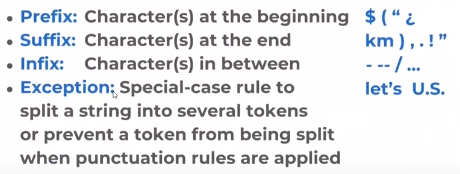

<h2>1. Using Split</h2>

In [38]:
sent1 = "I am going to delhi! I am excited"
sent1.split()

['I', 'am', 'going', 'to', 'delhi!', 'I', 'am', 'excited']

In [39]:
sent1.split(".")
# problems - won't consider ! marks or ? to split sentences

['I am going to delhi! I am excited']

<h2>2.Regular Expression</h2>

In [40]:
import re
tokens = re.findall("[\w']+",sent1)
tokens

['I', 'am', 'going', 'to', 'delhi', 'I', 'am', 'excited']

In [41]:
sentences = re.compile('[.!?]').split(sent1)
sentences

['I am going to delhi', ' I am excited']

<h2>3.NLTK</h2>

In [42]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [43]:
word_tokenize(sent1)

['I', 'am', 'going', 'to', 'delhi', '!', 'I', 'am', 'excited']

In [44]:
sent_tokenize(sent1)

['I am going to delhi!', 'I am excited']

In [45]:
sent2 = "I have a Ph.D in A.I."
sent3 = "My gmail id is meghashivhare8@gmail.com"
sent4 = "I live 10km from college and it take 1$ to reach home by bus"

In [46]:
word_tokenize(sent2)

['I', 'have', 'a', 'Ph.D', 'in', 'A.I', '.']

In [47]:
# problem - breaks email id into parts
word_tokenize(sent3)

['My', 'gmail', 'id', 'is', 'meghashivhare8', '@', 'gmail.com']

In [48]:
# problem - consider value in km as one token only
word_tokenize(sent4)

['I',
 'live',
 '10km',
 'from',
 'college',
 'and',
 'it',
 'take',
 '1',
 '$',
 'to',
 'reach',
 'home',
 'by',
 'bus']

<h2>4.Spacy</h2>

In [49]:
import spacy 
nlp = spacy.load('en_core_web_sm')

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [50]:
dic1 = nlp(sent1)
dic2 = nlp(sent2)
dic3 = nlp(sent3)
dic4 = nlp(sent4)

In [51]:
for token in dic1:
    print(token)

I
am
going
to
delhi
!
I
am
excited


In [52]:
# Problem - Consider Ph.D as different tokens
for token in dic2:
    print(token)

I
have
a
Ph
.
D
in
A.I.


In [53]:
for token in dic3:
    print(token)

My
gmail
i
d
is
meghashivhare8@gmail.com


In [54]:
for token in dic4:
    print(token)

I
live
10
km
from
college
and
it
take
1
$
to
reach
home
by
bus


# Stemming
In language **inflection** is a change in the form of a word (typically the ending) to express a grammatical function or attribute such as tense, mood, person, number, case, and gender.<br> 
For example - walk, walks, walking, walked. <br> 
Stemming is the process of reducing inflection to their root forms such as mapping a group of words to the same stem even if the stem itself is not valid word in the language<br> 
Stemming is mostly used in information retreival systems. <br> 

In [55]:
from nltk.stem.porter import PorterStemmer 

In [56]:
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [57]:
sample = "walk walks walking walked"
stem_words(sample)

'walk walk walk walk'

In [58]:
# Problem with stemming - it may produce stems which are not
# actual words or which have no meaning, hence it cannot be shown to customers or 
# used in that manner 
text = " situations we encounter same theme the director transfers the action to the present time new york where all these different characters meet and connect each one is connected in one way or another to the next person but no one seems to know the previous point of contact stylishly the film has a sophisticated luxurious look we are taken to see how these people live and the world they live in their own habitatthe only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits a big city is not exactly the best place in which human relations find sincere fulfillment as one discerns is the case with most of the people we encounterthe acting is good under mr matteis direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier and the rest of the talented cast make these characters come alivewe wish mr mattei good luck and await anxiously for his next work"
stem_words(text)

'situat we encount same theme the director transfer the action to the present time new york where all these differ charact meet and connect each one is connect in one way or anoth to the next person but no one seem to know the previou point of contact stylishli the film ha a sophist luxuri look we are taken to see how these peopl live and the world they live in their own habitatth onli thing one get out of all these soul in the pictur is the differ stage of loneli each one inhabit a big citi is not exactli the best place in which human relat find sincer fulfil as one discern is the case with most of the peopl we encounterth act is good under mr mattei direct steve buscemi rosario dawson carol kane michael imperioli adrian grenier and the rest of the talent cast make these charact come alivew wish mr mattei good luck and await anxious for hi next work'

# Lemmatization
Unlike stemming reduces inflected words properly ensuring that the **root word belongs to the language** <br>
In lemmatization root word is called lemma <br>
It works on dictionary like wordnet unlike stemming where algorithms are used <br>
It is slower as compared to stemming